## Projet Speed Dating

Dans ce projet nous devons utiliser les outils de Dataviz de python (seaborn, matplotlib) pour faire une analyse descriptive des principaux facteurs qui influencent la concordance entre deux partenaires, et la possibilité d'obtenir un deuxième rendez-vous lors d’un speed dating.

#### Importation des librairies qui seront utiles pour le traitement des données

In [435]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

#### Chargement du fichier csv contenant les données dans un dataframe

In [436]:
df = pd.read_csv("Speed_Dating_Data.csv", engine="python")

In [437]:
df.head()

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,...,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,0,1,1,1,10,7,NaN,4,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,0,1,1,1,10,7,NaN,3,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,1.0,0,1,1,1,10,7,NaN,10,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
3,1,1.0,0,1,1,1,10,7,NaN,5,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
4,1,1.0,0,1,1,1,10,7,NaN,7,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN


In [438]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8378 entries, 0 to 8377
Columns: 195 entries, iid to amb5_3
dtypes: float64(174), int64(13), object(8)
memory usage: 12.5+ MB


In [439]:
df1 = df.loc[:, ["wave", "iid", "gender", "age", "imprace", "imprelig", "field_cd", "goal", "pid", "samerace", "int_corr", "match"]]

In [440]:
df1.iid.nunique()

551

- Le jeu de données contient 195 colonnes et 8377 lignes
- Ces colonnes contiennent des informations varieés liées à la participation de chacun des individus de l'échantillon au speed dating
- Après une exploration approfondie du jeu de données, on choisi de sélectionner certaines colonnes pour construire un nouveau jeu de données sur lequel nous allons travailler par la suite
- Le jeu de données contient 551 individus uniques sur les 8377 lignes
- On va donc créer un autre jeu de données df2 qui contiendra les informations du participant 2 pour identifier aisément les paires de participants et les informations pour chacun d'eux et pour chacune de ces paires
- On renomme ensuite les colonnes de ce nouveau jeu de données pour avoir une colonne "pid" comme dans le jeu de données df
- Notons que cette colonne va être utile pour fusionner des dataframes df1 et df2

In [441]:
df2 = df.loc[:, ["iid", "gender", "age", "imprace", "imprelig", "field_cd", "goal"]]

In [442]:
df2 = df2.rename(columns={"iid": "pid",
                          "gender": "gender_o",
                          "age": "age_o",
                          "imprace": "imprace_o",
                          "imprelig": "imprelig_o",
                          "field_cd": "field_cd_o",
                          "goal": "goal_o"})

- On fait un merge des jeux de données df1 et df2 

In [443]:
df3 = pd.merge(df1, df2, on='pid')

- On supprime ensuite les doublons par paire "iid" et "pid"

In [444]:
df3 = df3.drop_duplicates(["iid", "pid"])

In [445]:
df3.head()

,wave,iid,gender,age,imprace,imprelig,field_cd,goal,pid,samerace,int_corr,match,gender_o,age_o,imprace_o,imprelig_o,field_cd_o,goal_o
0,1,1,0,21.0,2.0,4.0,1.0,2.0,11.0,0,0.14,0,1,27.0,7.0,3.0,8.0,1.0
10,1,2,0,24.0,2.0,5.0,1.0,1.0,11.0,1,0.29,0,1,27.0,7.0,3.0,8.0,1.0
20,1,3,0,25.0,8.0,4.0,2.0,6.0,11.0,1,-0.24,0,1,27.0,7.0,3.0,8.0,1.0
30,1,4,0,23.0,1.0,1.0,1.0,1.0,11.0,1,-0.18,0,1,27.0,7.0,3.0,8.0,1.0
40,1,5,0,21.0,8.0,1.0,1.0,2.0,11.0,1,-0.43,0,1,27.0,7.0,3.0,8.0,1.0


In [446]:
df3.groupby('iid').count().min()

wave          5
gender        5
age           0
imprace       0
imprelig      0
field_cd      0
goal          0
pid           5
samerace      5
int_corr      0
match         5
gender_o      5
age_o         4
imprace_o     4
imprelig_o    4
field_cd_o    4
goal_o        4
dtype: int64

In [447]:
df3.groupby('iid').count().max()

wave          22
gender        22
age           22
imprace       22
imprelig      22
field_cd      22
goal          22
pid           22
samerace      22
int_corr      22
match         22
gender_o      22
age_o         22
imprace_o     22
imprelig_o    22
field_cd_o    22
goal_o        22
dtype: int64

In [448]:
df.groupby('round').count()

,iid,id,gender,idg,condtn,wave,position,positin1,order,partner,...,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
round,,,,,,,,,,,,,,,,,,,,,
5,50,50,50,50,50,50,50,50,50,50,...,25,25,25,25,25,0,0,0,0,0
6,162,162,162,162,162,162,162,162,162,162,...,48,48,48,48,48,48,48,48,48,48
7,42,42,42,42,42,42,42,42,42,42,...,14,14,14,14,14,14,14,14,14,14
8,48,48,48,48,48,48,48,48,48,48,...,32,32,32,32,32,32,32,32,32,32
9,252,252,252,252,252,252,252,252,252,252,...,162,162,162,162,162,162,162,162,162,162
10,880,880,880,880,880,880,880,290,880,880,...,470,470,470,470,470,30,30,30,30,30
11,140,140,140,140,140,140,140,140,140,140,...,40,40,40,40,40,40,40,40,40,40
14,532,532,532,532,532,532,532,532,532,532,...,280,280,280,280,280,280,280,280,280,280
15,450,450,450,450,450,450,450,450,450,450,...,135,135,135,135,135,135,135,135,135,135


- Il y a en tout 21 évènements de speed dating organisés (wave)
- Dans chacun de ces évènements chaque participant rencontre au moins 5 personnes et au plus 22 personnes (round)

#### Matrice de corrélation entre les variables



- La matrice de corrélation nous permets d'observer les relations entre les variables

In [449]:
corr = df3.loc[:, ~df3.columns.isin(['iid', 'wave', 'pid'])].corr()

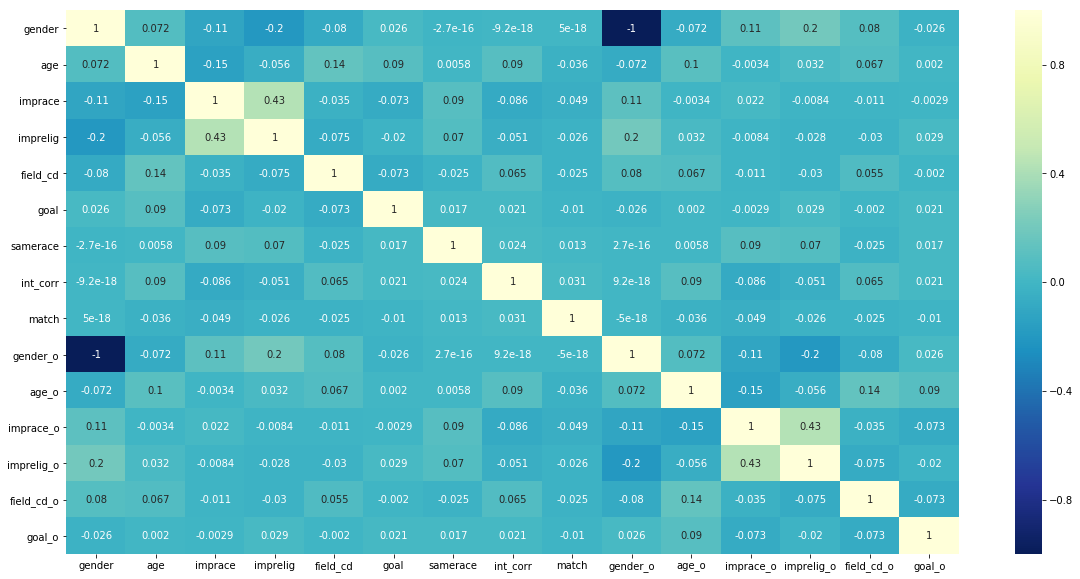

In [450]:
f, ax = plt.subplots(figsize=(20,10))
sns.heatmap(corr, annot=True, ax=ax, cmap="YlGnBu_r")

- Variables les plus corrélées au match : 
  - Int_corr (corrélation entre les notes attribuées aux centres d'intérêts)
  - samerace (participants de la même race oui (1) ou non (0))

### Data preprocessing

In [451]:
df4 = df3

- Les objectifs initiaux des participants (goal et goal_o) exprimés en nombre sont transformés en classes

In [452]:
df4["goal"] = df4.goal.apply(lambda x: "Fun" if x == 1
                                 else "Meet" if x == 2
                                 else "Date" if x ==3
                         else "Relationship" if x == 4
                             else "I did it" if x == 5
                                else "Other")

In [453]:
df4["goal_o"] = df4.goal_o.apply(lambda x: "Fun" if x == 1
                                     else "Meet" if x == 2
                                     else "Date" if x ==3
                             else "Relationship" if x == 4
                                 else "I did it" if x == 5
                                    else "Other")

- Les notes sont comprises entre 1 et 10 pour l'importance accordée au fait que le partenaire soit de la même race/religion
- Ces notes sont transformées dans une échelle de 1 à 3 (1 = "pas important", 2 = "important" et 3 = "très important")

In [454]:
df4["imprace"] = df4.imprace.apply(lambda x: 1 if x < 4
                                        else 2 if 4 <= x < 7
                                        else 3)

In [455]:
df4["imprace_o"] = df4.imprace_o.apply(lambda x: 1 if x < 4
                                            else 2 if 4 <= x < 7
                                            else 3)

In [456]:
df4["imprelig"] = df4.imprelig.apply(lambda x: 1 if x < 4
                                          else 2 if 4 <= x < 7
                                          else 3)

In [457]:
df4["imprelig_o"] = df4.imprelig_o.apply(lambda x: 1 if x < 4
                                              else 2 if 4 <= x < 7
                                              else 3)

- De même la plage des ages des participants, qui s'étend de 18 à 55 ans est divisée en 3 groupes

In [458]:
df4["age"] = df4.age.apply(lambda x: 1 if x <= 25
                                else 2 if 25 < x < 34
                                else 3)

In [459]:
df4["age_o"] = df4.age_o.apply(lambda x: 1 if x <= 25
                                    else 2 if 25 < x < 34
                                    else 3)

In [460]:
df4.head()

,wave,iid,gender,age,imprace,imprelig,field_cd,goal,pid,samerace,int_corr,match,gender_o,age_o,imprace_o,imprelig_o,field_cd_o,goal_o
0,1,1,0,1,1,2,1.0,Meet,11.0,0,0.14,0,1,2,3,1,8.0,Fun
10,1,2,0,1,1,2,1.0,Fun,11.0,1,0.29,0,1,2,3,1,8.0,Fun
20,1,3,0,1,3,2,2.0,Other,11.0,1,-0.24,0,1,2,3,1,8.0,Fun
30,1,4,0,1,1,1,1.0,Fun,11.0,1,-0.18,0,1,2,3,1,8.0,Fun
40,1,5,0,1,3,1,1.0,Meet,11.0,1,-0.43,0,1,2,3,1,8.0,Fun


### Quelques informations à propos du jeu de données

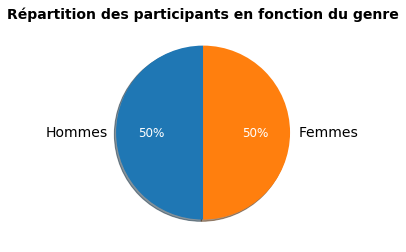

In [461]:
fig1_data = df4.gender.value_counts()/df4.gender.value_counts().sum()
fig1_data = fig1_data.rename(index={1: 'Hommes', 0: 'Femmes'})

labels = [fig1_data.index[item] for item in range(0, len(fig1_data.index))]
explode = (0.0,0.0)

fig, ax = plt.subplots()
_, texts, autotexts = ax.pie(fig1_data, autopct='%0.0f%%', shadow=True, startangle=90, explode=explode, labels=labels, radius=1.0)
#fig.legend(fig1_data.index, loc="center left")

for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_size('12')

for text in texts:
    text.set_size('14')
    
ax.set_title("Répartition des participants en fonction du genre", y=1.0, fontsize = 14, fontweight='bold')
plt.show()

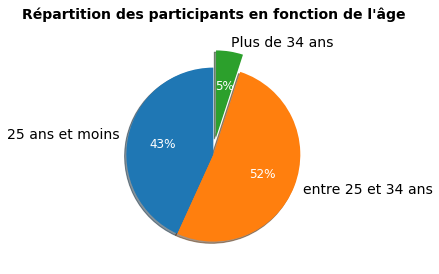

In [462]:
fig2_data = df4.age.value_counts()/df4.age.value_counts().sum()
fig2_data.sort_index(inplace=True)
fig2_data = fig2_data.rename(index={1: '25 ans et moins', 2: 'entre 25 et 34 ans', 3: 'Plus de 34 ans'})

labels = [fig2_data.index[item] for item in range(0, len(fig2_data.index))]
explode = (0.0,0.0,0.2)

fig, ax = plt.subplots()
_, texts, autotexts = ax.pie(fig2_data, autopct='%0.0f%%', shadow=True, startangle=90, explode=explode, labels=labels, radius=1.0)
#fig.legend(fig2_data.index, loc="center left")

for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_size('12')

for text in texts:
    text.set_size('14')
    
ax.set_title("Répartition des participants en fonction de l'âge", y=1.1, fontsize = 14, fontweight='bold')
plt.show()

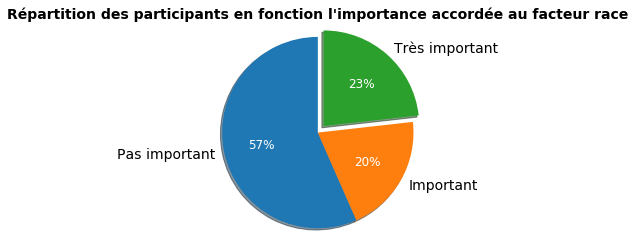

In [463]:
fig3_data = df4.imprace.value_counts()/df4.imprace.value_counts().sum()
fig3_data.sort_index(inplace=True)
fig3_data = fig3_data.rename(index={1: 'Pas important', 2: 'Important', 3: 'Très important'})

labels = [fig3_data.index[item] for item in range(0, len(fig3_data.index))]
explode = (0.0,0.0,0.1)

fig, ax = plt.subplots()
_, texts, autotexts = ax.pie(fig3_data, autopct='%0.0f%%', shadow=True, startangle=90, explode=explode, labels=labels, radius=1.1)
#fig.legend(fig1_data.index, loc="center left")

for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_size('12')
    
for text in texts:
    text.set_size('14')

ax.set_title("Répartition des participants en fonction l'importance accordée au facteur race", y=1.0, fontsize = 14, fontweight='bold')
plt.show()

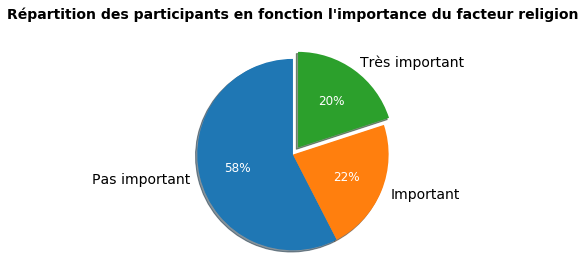

In [464]:
fig4_data = df4.imprelig.value_counts()/df4.imprelig.value_counts().sum()
fig4_data.sort_index(inplace=True)
fig4_data = fig4_data.rename(index={1: 'Pas important', 2: 'Important', 3: 'Très important'})

labels = [fig4_data.index[item] for item in range(0, len(fig4_data.index))]
explode = (0.0,0.0,0.1)

fig, ax = plt.subplots()
_, texts, autotexts = ax.pie(fig4_data, autopct='%0.0f%%', shadow=True, startangle=90, explode=explode, labels=labels, radius=1.1)
#fig.legend(fig2_data.index, loc="center left")

for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_size('12')

for text in texts:
    text.set_size('14')
    
ax.set_title("Répartition des participants en fonction l'importance du facteur religion", y=1.1, fontsize = 14, fontweight='bold')
plt.show()

### Influence des facteurs race et religion sur le "match" entre deux participants

- Avant le speed dating :
 - 60% de participants considèrent qu'il n'est pas important que le partenaire soit de la même race/religion qu'eux
 - 40% de participants en revance considèrent que ces facteurs sont importants, voire très importants
- On va analyser ci-dessous ce qu'il se passe après le speed dating,

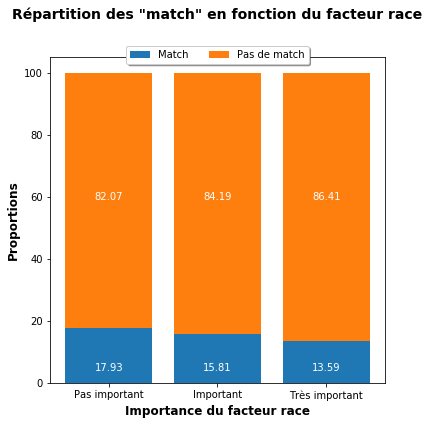

In [465]:
imprace_match = df4.imprace[df4.match == 1].value_counts()/df4.imprace.value_counts()
imprace_match.sort_index(inplace=True)
prop_imprace_match = [item*100 for item in imprace_match]
prop_imprace_nomatch = (np.array([100,100,100]) - prop_imprace_match)
legend = ["Pas important", "Important", "Très important"]

f, ax = plt.subplots(figsize=(6,6))

ax.bar(legend, prop_imprace_match, label="Match")
ax.bar(legend, prop_imprace_nomatch, bottom=prop_imprace_match, label="Pas de match")

ax.text(legend[0], 60, np.round(prop_imprace_nomatch[0],2), ha="center", va="center", color='w')
ax.text(legend[0], 5, np.round(prop_imprace_match[0],2), ha="center", va="center", color='w')

ax.text(legend[1], 60, np.round(prop_imprace_nomatch[1],2), ha="center", va="center", color='w')
ax.text(legend[1], 5, np.round(prop_imprace_match[1],2),ha="center", va="center", color='w')

ax.text(legend[2], 60, np.round(prop_imprace_nomatch[2],2), ha="center", va="center", color='w')
ax.text(legend[2], 5, np.round(prop_imprace_match[2],2),ha="center", va="center", color='w')

plt.ylabel('Proportions', fontsize=12, fontweight='bold')
plt.xlabel('Importance du facteur race', fontsize = 12, fontweight='bold')

ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05), ncol=2, fancybox=True, shadow=True)

ax.set_title("Répartition des \"match\" en fonction du facteur race", y=1.1, fontsize = 14, fontweight='bold')
plt.show()


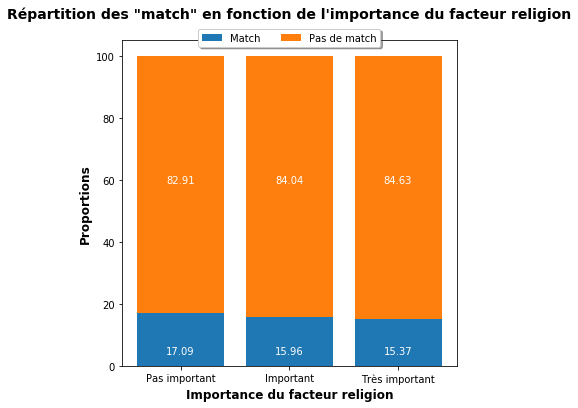

In [466]:
imprelig_match = df4.imprelig[df3.match == 1].value_counts()/df4.imprelig.value_counts()
imprelig_match.sort_index(inplace=True)
prop_imprelig_match = [item*100 for item in imprelig_match]
prop_imprelig_nomatch = (np.array([100,100,100]) - prop_imprelig_match)
legend = ["Pas important", "Important", "Très important"]

f, ax = plt.subplots(figsize=(6,6))

ax.bar(legend, prop_imprelig_match, label="Match")
ax.bar(legend, prop_imprelig_nomatch, bottom=prop_imprelig_match, label="Pas de match")

ax.text(legend[0], 60, np.round(prop_imprelig_nomatch[0],2), ha="center", va="center", color='w')
ax.text(legend[0], 5, np.round(prop_imprelig_match[0],2), ha="center", va="center", color='w')

ax.text(legend[1], 60, np.round(prop_imprelig_nomatch[1],2), ha="center", va="center", color='w')
ax.text(legend[1], 5, np.round(prop_imprelig_match[1],2),ha="center", va="center", color='w')

ax.text(legend[2], 60, np.round(prop_imprelig_nomatch[2],2), ha="center", va="center", color='w')
ax.text(legend[2], 5, np.round(prop_imprelig_match[2],2),ha="center", va="center", color='w')

plt.ylabel('Proportions', fontsize=12, fontweight='bold')
plt.xlabel('Importance du facteur religion', fontsize=12, fontweight='bold')

ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05), ncol=2, fancybox=True, shadow=True)

ax.set_title("Répartition des \"match\" en fonction de l'importance du facteur religion", y=1.05, fontsize=14, fontweight='bold')
plt.show()

- Le pourcentage de "match" croit légèrement lorsque l'importance accordée aux facteurs race et religion décroit

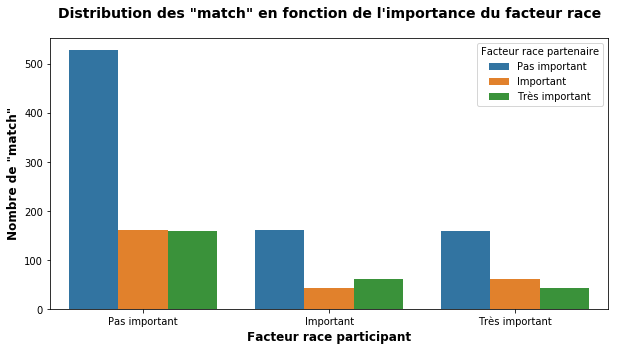

In [468]:
f, ax = plt.subplots(figsize=(10,5))
sns.countplot(df4[df4.match == 1].imprace, hue=df4[df4.match == 1].imprace_o, ax=ax)

new_title = "Distribution des \"match\" en fonction de l'importance du facteur race"
ax.set_title(new_title, y=1.05, fontsize=14, fontweight='bold')
ax.set_xticklabels(['Pas important', 'Important', 'Très important'])

plt.xlabel('Facteur race participant', fontsize=12, fontweight='bold')
plt.ylabel('Nombre de "match"', fontsize=12, fontweight='bold')
plt.legend(title='Facteur race partenaire', loc='upper right',labels=['Pas important', 'Important', 'Très important'])

plt.show()

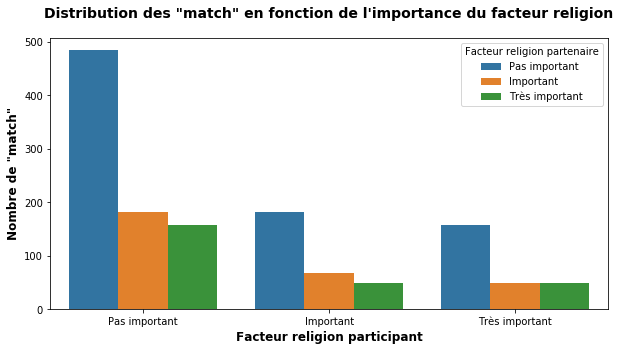

In [469]:
f, ax = plt.subplots(figsize=(10,5))
sns.countplot(df4[df4.match == 1].imprelig, hue=df4[df4.match == 1].imprelig_o, ax=ax)

new_title = "Distribution des \"match\" en fonction de l'importance du facteur religion"
ax.set_title(new_title, y=1.05, fontsize=14, fontweight='bold')
ax.set_xticklabels(['Pas important', 'Important', 'Très important'])

plt.xlabel('Facteur religion participant', fontsize=12, fontweight='bold')
plt.ylabel('Nombre de "match"', fontsize=12, fontweight='bold')
plt.legend(title='Facteur religion partenaire', loc='upper right',labels=['Pas important', 'Important', 'Très important'])

plt.show()

- Le nombre match décroit lorsque les facteurs race et religion deviennent de plus en plus importants pour les participants
- Le nombre de matches entre les partenaires les plus ouverts (race et religion) est le plus elevé
- Les partenaires les plus ouverts matchent également très bien avec les autres
- Les partenaires ayant les critères plus rigides matchent moins bien entre eux

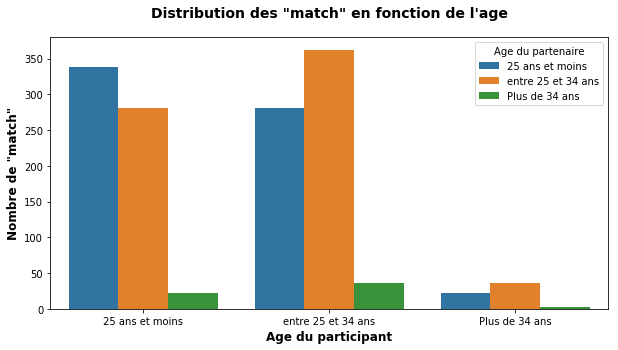

In [470]:
f, ax = plt.subplots(figsize=(10,5))
sns.countplot(df4[df4.match == 1].age, hue=df4[df4.match == 1].age_o, ax=ax)

new_title = "Distribution des \"match\" en fonction de l'age"
ax.set_title(new_title, y=1.05, fontsize=14, fontweight='bold')
ax.set_xticklabels(['25 ans et moins', 'entre 25 et 34 ans', 'Plus de 34 ans'])

plt.xlabel('Age du participant', fontsize=12, fontweight='bold')
plt.ylabel('Nombre de "match"', fontsize=12, fontweight='bold')
plt.legend(title='Age du partenaire', loc='upper right',labels=['25 ans et moins', 'entre 25 et 34 ans', 'Plus de 34 ans'])

plt.show()

- Beaucoup plus de "match" entre les 25-34 ans (qui du reste représentent 52% de l'échantillon) et entre ces derniers et les moins de 25 ans (43% de l'échantillon)

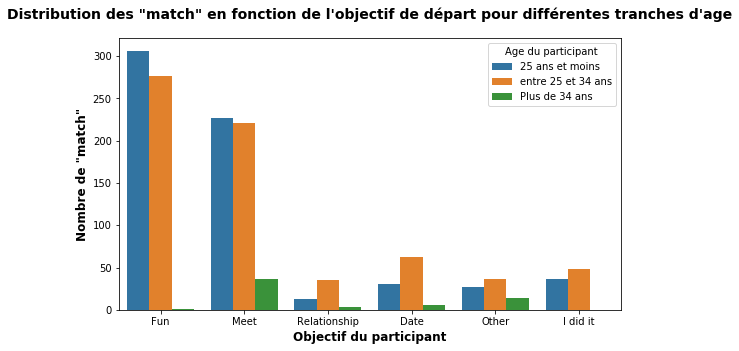

In [471]:
f, ax = plt.subplots(figsize=(9,5))
sns.countplot(df4.goal[df4.match == 1], hue=df4.age[df4.match ==1], ax=ax)

new_title = "Distribution des \"match\" en fonction de l'objectif de départ pour différentes tranches d'age"
ax.set_title(new_title, y=1.05, fontsize=14, fontweight='bold')

plt.xlabel('Objectif du participant', fontsize=12, fontweight='bold')
plt.ylabel('Nombre de "match"', fontsize=12, fontweight='bold')
plt.legend(title='Age du participant', loc='upper right',labels=['25 ans et moins', 'entre 25 et 34 ans', 'Plus de 34 ans'])

plt.show()

- Indépendamment de l'age, les participants qui ne prennent pas l'exercice trop au sérieux (Fun, Meet) dénombrent le plus de "match

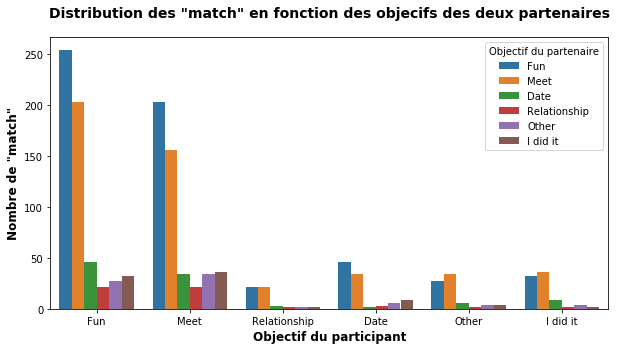

In [472]:
f, ax = plt.subplots(figsize=(10,5))
sns.countplot(df4[df4.match == 1].goal, hue=df4[df4.match == 1].goal_o, ax=ax)

new_title = "Distribution des \"match\" en fonction des objecifs des deux partenaires"
ax.set_title(new_title, y=1.05, fontsize=14, fontweight='bold')

plt.xlabel('Objectif du participant', fontsize=12, fontweight='bold')
plt.ylabel('Nombre de "match"', fontsize=12, fontweight='bold')
plt.legend(title='Objectif du partenaire', loc='upper right')

plt.show()

- Les participants qui ne prennent pas l'exercice trop au sérieux (Fun, Meet) dénombrent un très gand nombre de "match" entre eux. Ils matchent aussi avec les autres, même si le nombre est beaucoup moins élevé

In [473]:
old_val = [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0]
new_val = ['Law', 'Maths', 'Phsyco', 'Medical', 'Engineering',
           'Journalism', 'History', 'Finance', 'Education',
           'Chemistry/Phsysics', 'Social', 'Undergrad',
           'Political Science', 'Film', 'Art', 'Languages', 'Architecture', 'Other']

def replace(row):
    for item in range(len(old_val)):
        if row == old_val[item]:
            row = new_val[item]
    return row

df4.field_cd = df4.field_cd.apply(replace)
df4.field_cd_o = df4.field_cd_o.apply(replace)

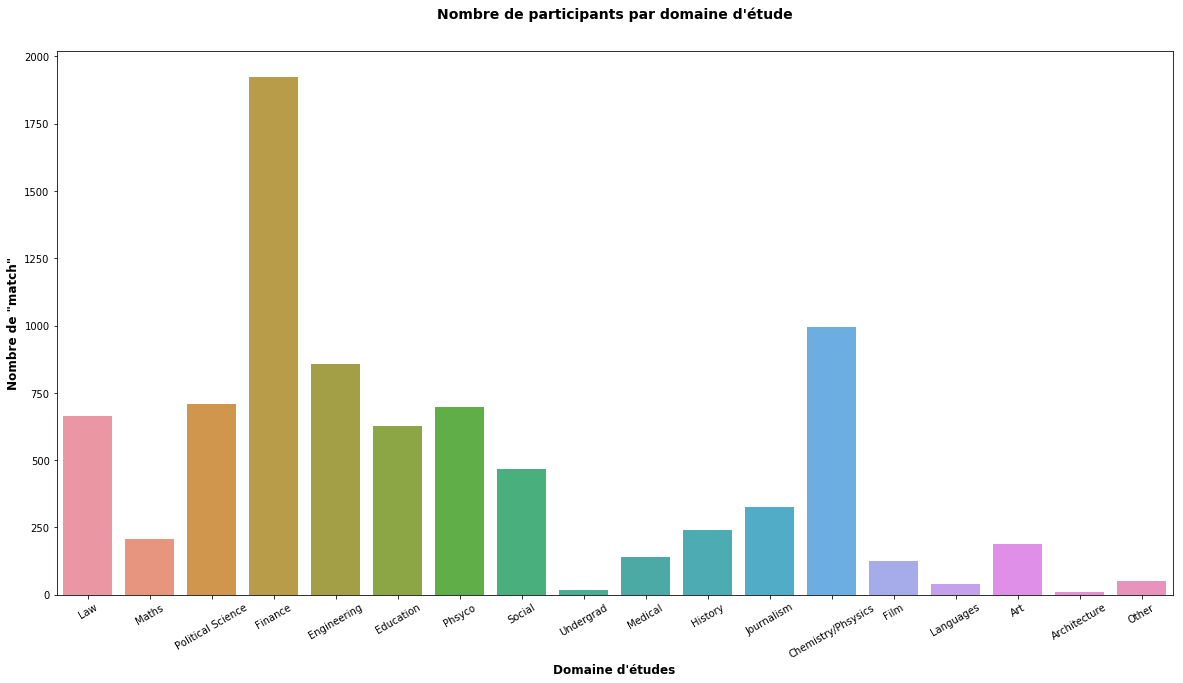

In [474]:
f, ax = plt.subplots(figsize=(20,10))
sns.countplot(df4.field_cd, ax=ax)

new_title = "Nombre de participants par domaine d'étude"
ax.set_title(new_title, y=1.05, fontsize=14, fontweight='bold')

plt.xlabel("Domaine d'études", fontsize=12, fontweight='bold')
plt.ylabel('Nombre de "match"', fontsize=12, fontweight='bold')
plt.xticks(rotation=30)

plt.show()

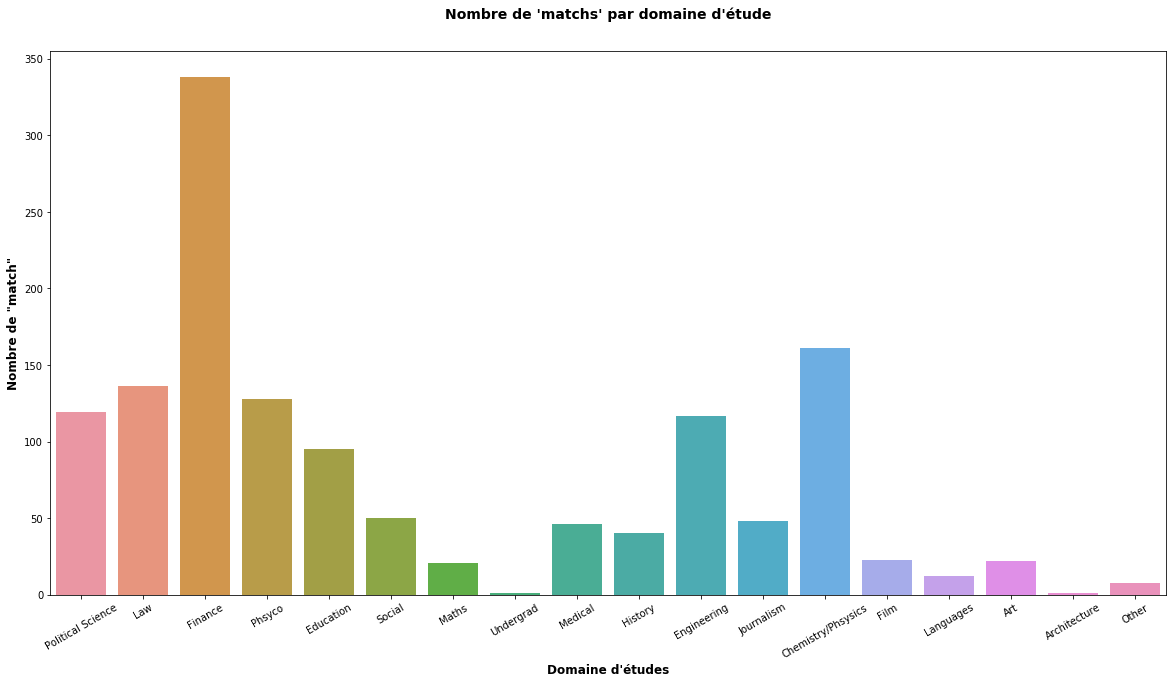

In [475]:
f, ax = plt.subplots(figsize=(20,10))
sns.countplot(df4.field_cd[df4.match == 1], ax=ax)

new_title = "Nombre de 'matchs' par domaine d'étude"
ax.set_title(new_title, y=1.05, fontsize=14, fontweight='bold')

plt.xlabel("Domaine d'études", fontsize=12, fontweight='bold')
plt.ylabel('Nombre de "match"', fontsize=12, fontweight='bold')
plt.xticks(rotation=30)

plt.show()

- Le nombre matches semble proportionnel au nombre de participants dans chaque domaine d'études

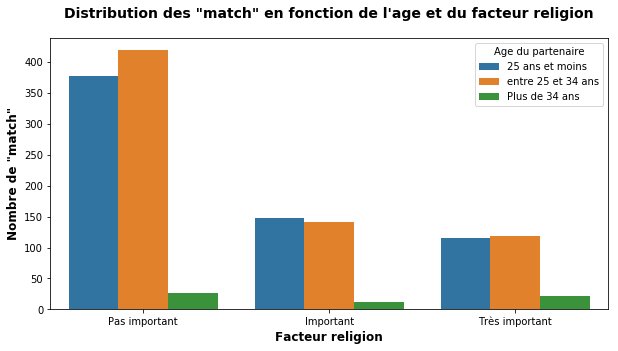

In [488]:
f, ax = plt.subplots(figsize=(10,5))
sns.countplot(df4[df4.match == 1].imprelig, hue=df4[df4.match == 1].age, ax=ax)
new_title = "Distribution des \"match\" en fonction de l'age et du facteur religion"

ax.set_title(new_title, y=1.05, fontsize=14, fontweight='bold')
ax.set_xticklabels(['Pas important', 'Important', 'Très important'])

plt.xlabel('Facteur religion', fontsize=12, fontweight='bold')
plt.ylabel('Nombre de "match"', fontsize=12, fontweight='bold')
plt.legend(title='Age du partenaire', loc='upper right',labels=['25 ans et moins', 'entre 25 et 34 ans', 'Plus de 34 ans'])

plt.show()

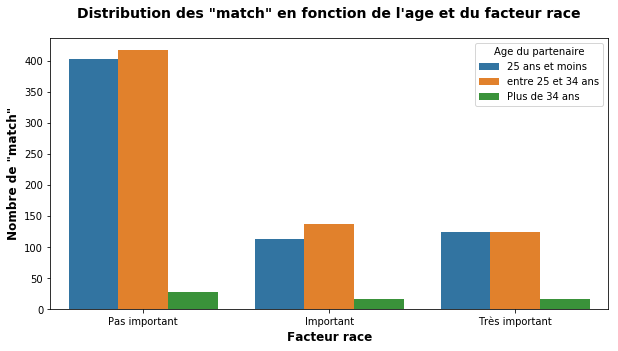

In [487]:
f, ax = plt.subplots(figsize=(10,5))
sns.countplot(df4[df4.match == 1].imprace, hue=df4[df4.match == 1].age, ax=ax)
new_title = "Distribution des \"match\" en fonction de l'age et du facteur race"

ax.set_title(new_title, y=1.05, fontsize=14, fontweight='bold')
ax.set_xticklabels(['Pas important', 'Important', 'Très important'])

plt.xlabel('Facteur race', fontsize=12, fontweight='bold')
plt.ylabel('Nombre de "match"', fontsize=12, fontweight='bold')
plt.legend(title='Age du partenaire', loc='upper right', labels=['25 ans et moins', 'entre 25 et 34 ans', 'Plus de 34 ans'])

plt.show()

- Les moins de 34 ans pour qui les fateurs race et religion ne sont pas importants ont plus de 'match' que les autres
- Indépendamment des facteurs race et religion, les moins de 34 ans ont plus de 'match' que les plus de 34 ans

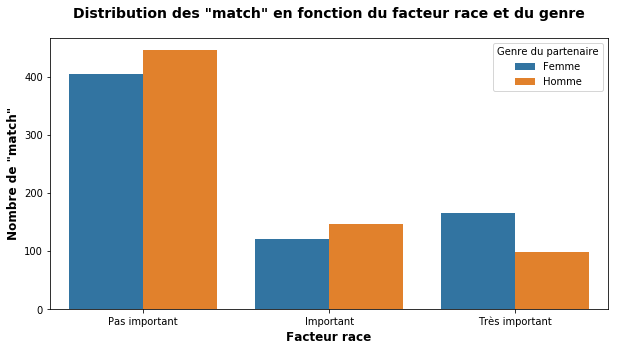

In [489]:
f, ax = plt.subplots(figsize=(10,5))
sns.countplot(df4[df4.match == 1].imprace, hue=df4[df4.match == 1].gender, ax=ax)
new_title = "Distribution des \"match\" en fonction du facteur race et du genre"

ax.set_title(new_title, y=1.05, fontsize=14, fontweight='bold')
ax.set_xticklabels(['Pas important', 'Important', 'Très important'])

plt.xlabel('Facteur race', fontsize=12, fontweight='bold')
plt.ylabel('Nombre de "match"', fontsize=12, fontweight='bold')
plt.legend(title='Genre du partenaire', loc='upper right', labels=['Femme', 'Homme'])

plt.show()

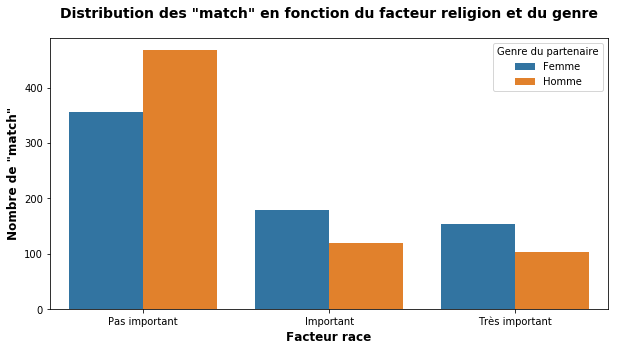

In [485]:
f, ax = plt.subplots(figsize=(10,5))
sns.countplot(df4[df4.match == 1].imprelig, hue=df4[df4.match == 1].gender, ax=ax)
new_title = "Distribution des \"match\" en fonction du facteur religion et du genre"

ax.set_title(new_title, y=1.05, fontsize=14, fontweight='bold')
ax.set_xticklabels(['Pas important', 'Important', 'Très important'])

plt.xlabel('Facteur race', fontsize=12, fontweight='bold')
plt.ylabel('Nombre de "match"', fontsize=12, fontweight='bold')
plt.legend(title='Genre du partenaire', loc='upper right', labels=['Femme', 'Homme'])

plt.show()